# Classification Project

In this project the dataset describes some fetures from the passengers of the Titanic. The goal is the prediction of each passenger's class ticket. As the classes of tickets are 3, this demands a multilabel classification model. I built, trained, evaluated and tested a Logistic Regressor, Random Forest Classification, Decision Tree Regressor model

In [2]:
!pip install sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import KBinsDiscretizer

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('/home/evangelo/decision-dill-student-code/week02/week02/data/train.csv')

In [31]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
y = train['Pclass']
X = train.drop('Pclass', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

# Logistic Regression

In [6]:
impute_bin_pipeline = Pipeline([
    ('my_impu', SimpleImputer(strategy='mean')),
    ('my_bin', KBinsDiscretizer())
])


column_transformer = ColumnTransformer([
 ('ohe_ct', OneHotEncoder(), ['Survived', 'Sex', 'Embarked']),
 ('impute_bin', impute_bin_pipeline, ['Age', 'Fare']),
 ('pass', 'passthrough', ['SibSp', 'Parch']),
], remainder='drop')


general_pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('model', LogisticRegression())
])

In [7]:
X_train_transformed = column_transformer.fit_transform(X_train)

In [8]:
general_pipeline.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('ohe_ct', OneHotEncoder(),
                                                  ['Survived', 'Sex',
                                                   'Embarked']),
                                                 ('impute_bin',
                                                  Pipeline(steps=[('my_impu',
                                                                   SimpleImputer()),
                                                                  ('my_bin',
                                                                   KBinsDiscretizer())]),
                                                  ['Age', 'Fare']),
                                                 ('pass', 'passthrough',
                                                  ['SibSp', 'Parch'])])),
                ('model', LogisticRegression())])

In [9]:
X_test.shape

(179, 11)

In [10]:
general_pipeline.predict(X_test)

array([2, 2, 3, 2, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 1, 3, 1, 2, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 2, 1, 3,
       2, 2, 1, 2, 3, 1, 3, 2, 1, 1, 3, 1, 2, 3, 1, 1, 3, 1, 3, 1, 2, 1,
       3, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3,
       1, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 1, 1,
       3, 3, 2, 3, 1, 2, 3, 2, 1, 3, 1, 1, 3, 2, 3, 3, 1, 2, 3, 3, 3, 3,
       1, 1, 3, 3, 1, 3, 2, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       2, 2, 2])

In [11]:
general_pipeline.predict_proba(X_test)

array([[9.70593965e-02, 7.15700008e-01, 1.87240596e-01],
       [1.18989348e-02, 6.33265960e-01, 3.54835105e-01],
       [1.53589181e-01, 6.84516399e-02, 7.77959179e-01],
       [2.34293203e-03, 6.36788029e-01, 3.60869039e-01],
       [9.90155129e-01, 5.92645963e-03, 3.91841133e-03],
       [8.94010818e-01, 5.68235625e-02, 4.91656191e-02],
       [9.44530172e-01, 4.64834128e-02, 8.98641481e-03],
       [2.75395761e-02, 1.32594240e-02, 9.59201000e-01],
       [3.64002255e-02, 4.36695393e-02, 9.19930235e-01],
       [4.49496485e-02, 1.31756585e-02, 9.41874693e-01],
       [4.36815514e-01, 4.63988480e-01, 9.91960061e-02],
       [2.58210601e-02, 3.35755873e-01, 6.38423066e-01],
       [9.79447504e-01, 9.09398127e-03, 1.14585150e-02],
       [9.43195541e-01, 4.14905168e-02, 1.53139423e-02],
       [3.73864656e-02, 7.39164609e-01, 2.23448925e-01],
       [6.88898733e-03, 3.42198106e-01, 6.50912906e-01],
       [8.92944743e-02, 1.58109877e-01, 7.52595649e-01],
       [4.36815514e-01, 4.63988

In [12]:
general_pipeline.score(X_test, y_test), general_pipeline.score(X_train, y_train)

(0.8659217877094972, 0.8735955056179775)

In [13]:
scores = cross_val_score(
    LogisticRegression(),
    X_train_transformed,
    y_train,
    cv=KFold(5,shuffle=True)
    )

print(f'Validation accuracy scores: {np.round(scores, 5)}')
print(f'\nmean: {scores.mean():.2}')
print(f'\nstd: {scores.std():.2}')

Validation accuracy scores: [0.87413 0.84615 0.87324 0.84507 0.85211]

mean: 0.86

std: 0.013


In [14]:
def plot_heatmap(confusion):
    
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion,
                xticklabels = np.unique(y),
                yticklabels = np.unique(y),
                cmap = 'BuPu',
                annot=True,
                fmt = 'g'
               )

    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize = 14)

In [15]:
ypred = general_pipeline.predict(X) 
accuracy_score(y, ypred)

0.8720538720538721

In [94]:
print('Logistic Regression for Multi-class of passengers\' tickets')
print('\n')
print(f"""precision = {round(precision_score(y,ypred, average='micro'),2)} \n 
recall = {round(recall_score(y,ypred, average='micro'),2)}\n
f1 = {round(f1_score(y,ypred, average='micro'),2)}""")

Logistic Regression for Multi-class of passengers' tickets


precision = 0.87 
 
recall = 0.87

f1 = 0.87


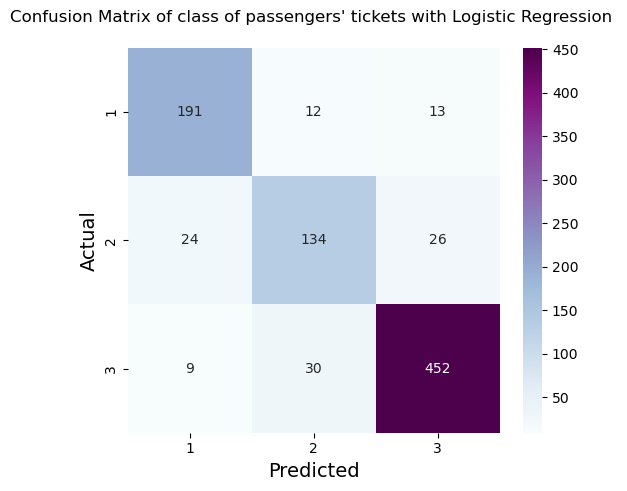

In [34]:
conf = confusion_matrix(y, ypred)
plot_heatmap(conf);
plt.title('Confusion Matrix of class of passengers\' tickets with Logistic Regression \n');

In [18]:
y_score = general_pipeline.fit(X_train, y_train).predict_proba(X_test)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

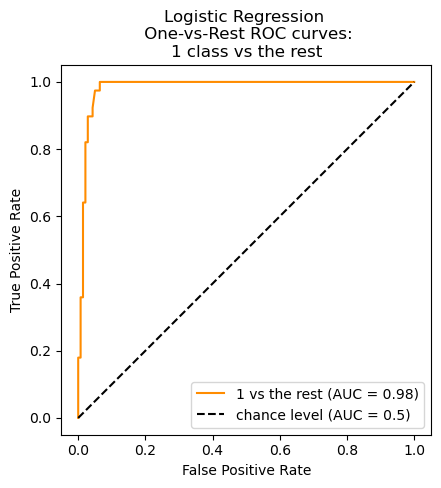

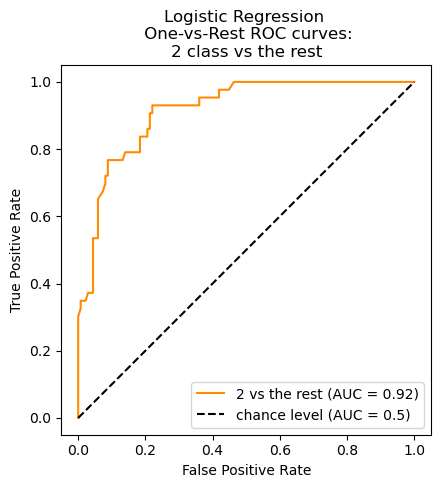

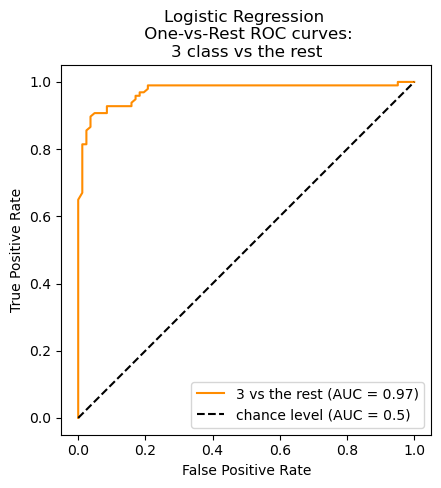

In [78]:
for i in [1,2,3]:
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color="darkorange"
         )

    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Logistic Regression \n One-vs-Rest ROC curves:\n{i} class vs the rest")
    plt.legend()
    plt.show()

# Random Forest Classification

In [20]:
from sklearn.ensemble import RandomForestClassifier

impute_bin_pipeline = Pipeline([
    ('my_impu', SimpleImputer(strategy='mean')),
    ('my_bin', KBinsDiscretizer())
])


column_transformer = ColumnTransformer([
 ('ohe_ct', OneHotEncoder(), ['Survived', 'Sex', 'Embarked']),
 ('impute_bin', impute_bin_pipeline, ['Age', 'Fare']),
 ('pass', 'passthrough', ['SibSp', 'Parch']),
], remainder='drop')

general_pipeline_2 = Pipeline([
    ('column_transformer', column_transformer),
    ('model', RandomForestClassifier(n_estimators=210, max_depth=100))
])

In [21]:
general_pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('ohe_ct', OneHotEncoder(),
                                                  ['Survived', 'Sex',
                                                   'Embarked']),
                                                 ('impute_bin',
                                                  Pipeline(steps=[('my_impu',
                                                                   SimpleImputer()),
                                                                  ('my_bin',
                                                                   KBinsDiscretizer())]),
                                                  ['Age', 'Fare']),
                                                 ('pass', 'passthrough',
                                                  ['SibSp', 'Parch'])])),
                ('model',
                 RandomForestClassifier(max_depth=100, n_estimators=210))])

In [82]:
scores_2 = cross_val_score(
    RandomForestClassifier(),
    X_train_transformed,
    y_train,
    cv=KFold(5,shuffle=True)
    )

print(f'Validation accuracy scores: {np.round(scores_2, 5)}')
print(f'\nmean: {scores_2.mean():.2}')
print(f'\nstd: {scores_2.std():.2}')

Validation accuracy scores: [0.86014 0.85315 0.83803 0.89437 0.83803]

mean: 0.86

std: 0.021


In [22]:
general_pipeline_2.score(X_test, y_test), general_pipeline_2.score(X_train, y_train)

(0.888268156424581, 0.9466292134831461)

In [24]:
ypred_2 = general_pipeline_2.predict(X) 
accuracy_score(y, ypred_2)

0.9349046015712682

In [92]:
print('Random Forest Classification for passengers\' tickets')
print('\n')
print(f"""precision = {round(precision_score(y,ypred_2, average='micro'),4)} \n 
recall = {round(recall_score(y,ypred_2, average='micro'),4)}\n
f1 = {round(f1_score(y,ypred_2, average='micro'),4)}""")

Random Forest Classification for passengers' tickets


precision = 0.9349 
 
recall = 0.9349

f1 = 0.9349


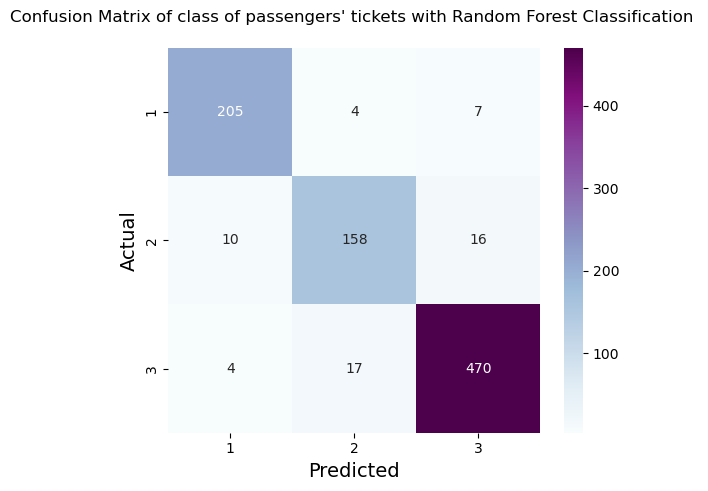

In [75]:
conf_2 = confusion_matrix(y, ypred_2)
plot_heatmap(conf_2);
plt.title('Confusion Matrix of class of passengers\' tickets with Random Forest Classification \n');

In [97]:
y_score_2 = general_pipeline_2.fit(X_train, y_train).predict_proba(X_test)

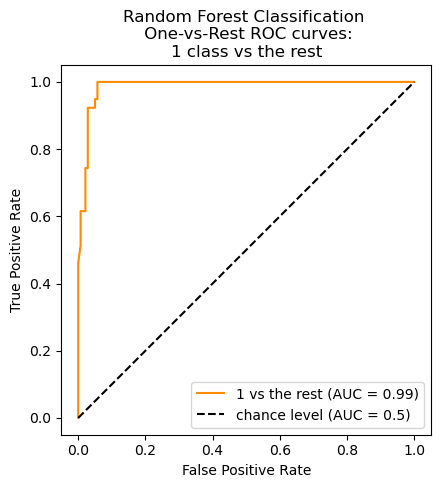

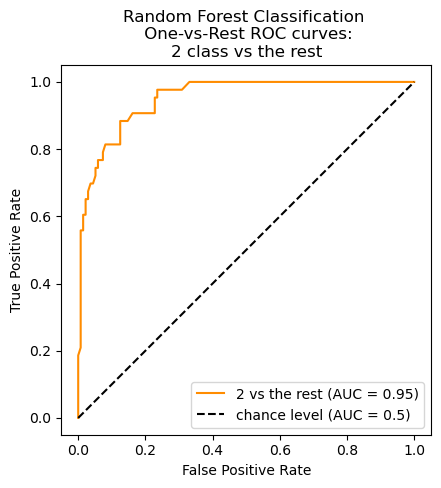

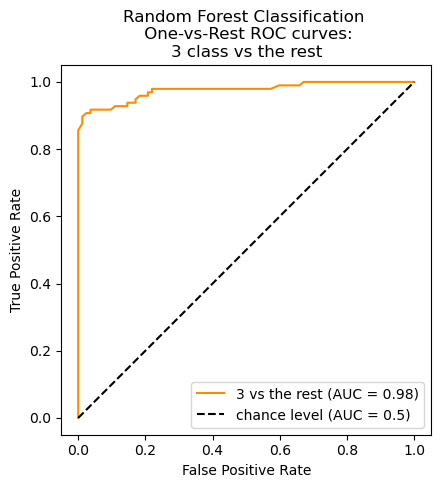

In [98]:
for i in [1,2,3]:
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_2[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color="darkorange"
         )

    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Random Forest Classification \n One-vs-Rest ROC curves:\n{i} class vs the rest")
    plt.legend()
    plt.show()

# Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

impute_bin_pipeline = Pipeline([
    ('my_impu', SimpleImputer(strategy='mean')),
    ('my_bin', KBinsDiscretizer())
])


column_transformer = ColumnTransformer([
 ('ohe_ct', OneHotEncoder(), ['Survived', 'Sex', 'Embarked']),
 ('impute_bin', impute_bin_pipeline, ['Age', 'Fare']),
 ('pass', 'passthrough', ['SibSp', 'Parch']),
], remainder='drop')


general_pipeline_3 = Pipeline([
    ('column_transformer', column_transformer),
    ('model', DecisionTreeClassifier())
])

In [84]:
general_pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('ohe_ct', OneHotEncoder(),
                                                  ['Survived', 'Sex',
                                                   'Embarked']),
                                                 ('impute_bin',
                                                  Pipeline(steps=[('my_impu',
                                                                   SimpleImputer()),
                                                                  ('my_bin',
                                                                   KBinsDiscretizer())]),
                                                  ['Age', 'Fare']),
                                                 ('pass', 'passthrough',
                                                  ['SibSp', 'Parch'])])),
                ('model', DecisionTreeClassifier())])

In [86]:
scores_3 = cross_val_score(
    DecisionTreeClassifier(),
    X_train_transformed,
    y_train,
    cv=KFold(5,shuffle=True)
    )

print(f'Validation accuracy scores: {np.round(scores_3, 5)}')
print(f'\nmean: {scores_3.mean():.2}')
print(f'\nstd: {scores_3.std():.2}')

Validation accuracy scores: [0.83217 0.85315 0.85211 0.85211 0.90141]

mean: 0.86

std: 0.023


In [87]:
general_pipeline_3.score(X_test, y_test), general_pipeline_3.score(X_train, y_train)

(0.888268156424581, 0.9466292134831461)

In [89]:
ypred_3 = general_pipeline_3.predict(X) 
accuracy_score(y, ypred_3)

0.9349046015712682

In [91]:
print('Decision Tree Classification for passengers\' tickets')
print('\n')
print(f"""precision = {round(precision_score(y,ypred_3, average='micro'),4)} \n 
recall = {round(recall_score(y,ypred_3, average='micro'),4)}\n
f1 = {round(f1_score(y,ypred_3, average='micro'),4)}""")

Decision Tree Classification for passengers' tickets


precision = 0.9349 
 
recall = 0.9349

f1 = 0.9349


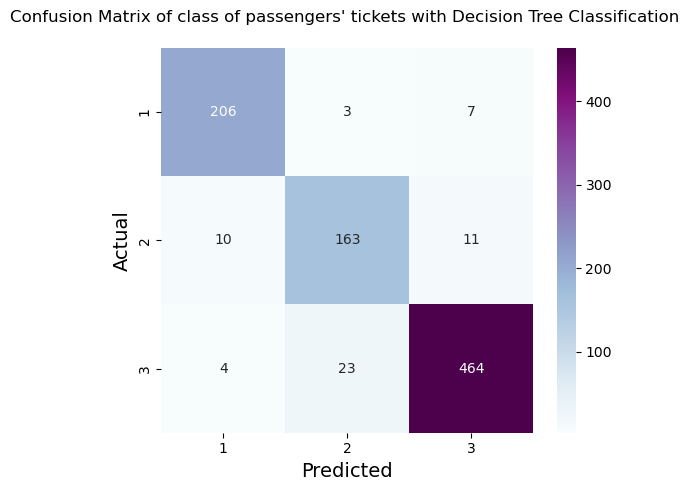

In [96]:
conf_3 = confusion_matrix(y, ypred_3)
plot_heatmap(conf_3);
plt.title('Confusion Matrix of class of passengers\' tickets with Decision Tree Classification \n');

In [99]:
y_score_3 = general_pipeline_3.fit(X_train, y_train).predict_proba(X_test)

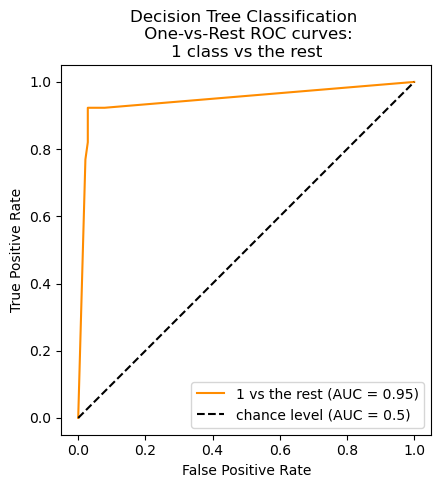

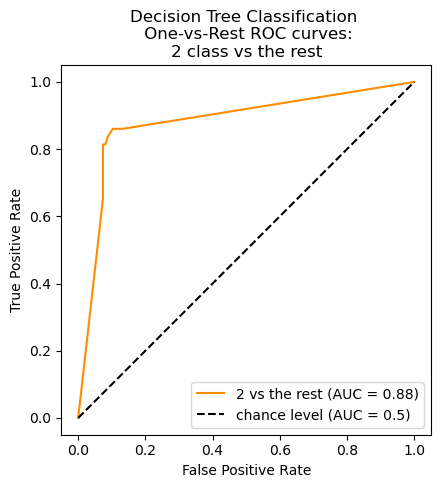

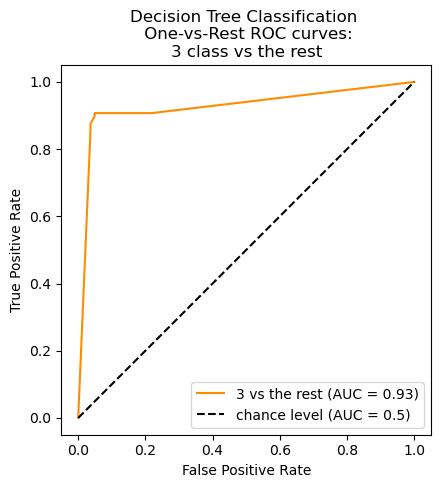

In [101]:
for i in [1,2,3]:
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_3[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color="darkorange"
         )

    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Decision Tree Classification \n One-vs-Rest ROC curves:\n{i} class vs the rest")
    plt.legend()
    plt.show()